Analisando o ponto 0
Analisando a estaca 0 e a estaca 1: distância entre pontos finais = 2.19 & menor distância entre os 2 vetores = 2.19
Ajustando a estaca 0: novas coordenadas finais = [-0.0, 0.9, -20.0]
Analisando o ponto 0
Analisando a estaca 0 e a estaca 1: distância entre pontos finais = 2.19 & menor distância entre os 2 vetores = 2.19
Ajustando a estaca 0: novas coordenadas finais = [0.0, 0.9, -20.0]
Analisando o ponto 0
Analisando a estaca 0 e a estaca 1: distância entre pontos finais = 2.19 & menor distância entre os 2 vetores = 2.19
Ajustando a estaca 0: novas coordenadas finais = [-3.17, 3.21, -19.61]
Analisando o ponto 0
Analisando a estaca 0 e a estaca 1: distância entre pontos finais = 6.1 & menor distância entre os 2 vetores = 2.39
Analisando a estaca 0 e a estaca 2: distância entre pontos finais = 7.87 & menor distância entre os 2 vetores = 4.28
Analisando a estaca 0 e a estaca 3: distância entre pontos finais = 9.72 & menor distância entre os 2 vetores = 6.24
Analisand

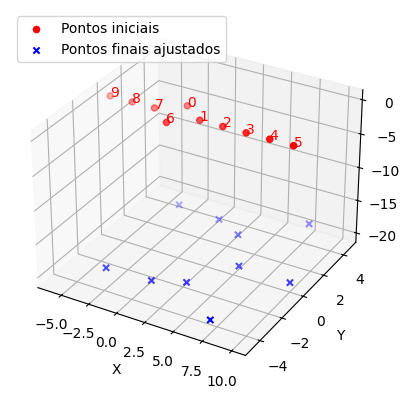

In [11]:
import numpy as np
comprimento = 20
distancia_minima = 2.5
angulos_1 = np.array([-90, -84.29, -82.87, -80.54, -78.69, -75.96])
angulos_2 = np.array([0, 180])

raio_estaca = 0.5
distancia = raio_estaca * 2.5 #5 vezes o raio da estaca
largura = 6
altura = 3
n_estacas = int(4)
n_estacas_centrais = int(round(2))
d_dolphins_embarcação = largura + 5

# Função para calcular a distância euclidiana entre dois pontos em R3
def distancia_entre_pontos_r3(p1, p2):
    return round(np.linalg.norm(p1 - p2),2)

# Função para converter coordenadas esféricas para cartesianas
def spherical_to_cartesian(x_inicial, y_inicial, z_inicial, L_estacas, angulos_verticais_theta, angulos_horizontais_theta):
    angulo_vertical_rad = np.deg2rad(angulos_verticais_theta)
    angulo_horizontal_rad = np.deg2rad(angulos_horizontais_theta)
    
    componente_x = L_estacas * np.cos(angulo_vertical_rad) * np.cos(angulo_horizontal_rad)
    componente_y = L_estacas * np.cos(angulo_vertical_rad) * np.sin(angulo_horizontal_rad)
    componente_z = L_estacas * np.sin(angulo_vertical_rad)

    x_final = x_inicial + componente_x
    y_final = y_inicial + componente_y
    z_final = z_inicial + componente_z

    return x_final, y_final, z_final

# Função para encontrar a menor distância entre os vetores correspondentes aos índices k e l
def encontrar_menor_distancia_entre_vetores(pontos_iniciais, pontos_finais, k, l, comprimento):

    vetor_k = pontos_finais[k] - pontos_iniciais[k]
    vetor_l = pontos_finais[l] - pontos_iniciais[l]

    vetor_dividido_k = vetor_k / comprimento
    vetor_dividido_l = vetor_l / comprimento

    menor_distancia = float('inf')
    ponto_menor_distancia_v1 = None
    ponto_menor_distancia_v2 = None
    N_v1 = None
    N_v2 = None

    for N1 in np.arange(1, 19, 1):
        for N2 in np.arange(1, 19, 1):
            ponto_v1 = pontos_iniciais[k] + N1 * vetor_dividido_k
            ponto_v2 = pontos_iniciais[l] + N2 * vetor_dividido_l

            dist = round(distancia_entre_pontos_r3(ponto_v1, ponto_v2),2)

            if dist < menor_distancia:
                menor_distancia = dist
                ponto_menor_distancia_v1 = ponto_v1
                ponto_menor_distancia_v2 = ponto_v2
                N_v1 = N1
                N_v2 = N2

    return menor_distancia, ponto_menor_distancia_v1, ponto_menor_distancia_v2, N_v1, N_v2


# Função para ajustar os pontos finais com base nas distâncias mínimas
def verificar_e_ajustar_pontos(pontos, comprimento, distancia_minima, pontos_finais, max_iteracoes=100000):
    iteracao = 0  # Contador de iterações para evi tar loops infinitos
    pontos_finais = np.array(pontos_finais)

    for k in range(n_estacas + n_estacas_centrais):
        while True:
            ajustou_ponto = False  # Flag para verificar se o ponto foi ajustado
            copia_pontos_finais = np.copy(pontos_finais)

            print(f"Analisando o ponto {k}")

            for l in range(len(pontos_finais)):
                if k == l:
                    continue
                ponto1 = pontos_finais[k]
                ponto2 = pontos_finais[l]
                dist = distancia_entre_pontos_r3(ponto1, ponto2)
                menor_distancia, _, _, _, _ = encontrar_menor_distancia_entre_vetores(pontos, pontos_finais, k, l, comprimento)

                print(f"Analisando a estaca {k} e a estaca {l}: distância entre pontos finais = {dist} & menor distância entre os 2 vetores = {menor_distancia}")

                if menor_distancia < 3 * raio_estaca or dist < 5 * raio_estaca:
                    ajustou_ponto = True
                    # Verificar se o ponto atual é uma estaca central ou não
                    if k < n_estacas:
                        novo_angulo_vertical = np.random.choice(angulos_1)
                        novo_angulo_horizontal = np.round(np.random.uniform(0, 360), 2)
                    else:
                        novo_angulo_vertical = np.random.choice(angulos_1)
                        novo_angulo_horizontal = np.random.choice(angulos_2)

                    # Calcular novas coordenadas finais
                    x_novo, y_novo, z_novo = spherical_to_cartesian(
                        pontos[k][0], pontos[k][1], pontos[k][2],
                        comprimento, novo_angulo_vertical, novo_angulo_horizontal
                    )
                    # Arredondar as coordenadas finais
                    x = np.round(x_novo, 2)
                    y = np.round(y_novo, 2)
                    z = np.round(z_novo, 2)

                    # Atualizar as coordenadas finais do ponto original
                    if k < n_estacas:
                        pontos_finais[k, :] = [x, y, z]
                        pontos_finais[k + n_estacas + n_estacas_centrais, :] = [x, -y, z]
                    else:
                        pontos_finais[k, :] = [x, y, z]

                    print(f"Ajustando a estaca {k}: novas coordenadas finais = {[x, y, z]}")
                    break  # Saia do loop 'l' e recomece a verificação para o mesmo ponto 'k'

            if not ajustou_ponto:
                print(f"Coordenada não ajustada da estaca {k}: {copia_pontos_finais[k]}")
                print(f"Coordenada final da estaca {k}: {pontos_finais[k]}")
                break  # Sai do loop 'while' e passa para o próximo ponto 'k'

            iteracao += 1
            if iteracao >= max_iteracoes:
                print(f"Número máximo de iterações atingido. Há pontos não ajustados. Última estaca ajustado: {k}")
                return []

    return pontos_finais



pontos_iniciais = np.array([[0, 0.9, 0],[2, 0, 0],[4, 0, 0],[6, 0, 0],[8, 0.0, 0],[10, 0.0, 0],[0, -0.9, 0],[-2, 0, 0],[-4, 0, 0],[-6, 0, 0]])

pontos_finais = np.array([[0, 0.9, -20],[2, 0, -20],[4, 0, -20],[6, 0, -20],[8, 0.0, -20],[10, 0.0, -20],[0, -0.9, -20],[-2, 0, -20],[-4, 0, -20],[-6, 0, -20]])

# Ajustar pontos finais com base na distância mínima
pontos_finais_ajustados = verificar_e_ajustar_pontos(pontos_iniciais, comprimento, distancia_minima, pontos_finais)

print(pontos_finais_ajustados)

#plotar um scatter plot 2D com os pontos inicias e outro com os finais
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ENUMERAR OS PONTOS INICIAIS E FINAIS
for i, txt in enumerate(pontos_iniciais):
    ax.text(txt[0], txt[1], txt[2], f'{i}', color='red')

ax.scatter(pontos_iniciais[:, 0], pontos_iniciais[:, 1], pontos_iniciais[:, 2], c='r', marker='o', label='Pontos iniciais')

ax.scatter(pontos_finais_ajustados[:, 0], pontos_finais_ajustados[:, 1], pontos_finais_ajustados[:, 2], c='b', marker='x', label='Pontos finais ajustados')

ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.legend(loc='upper left')
plt.show()
